# Looking at and Processing ADNI data.

In [1]:
import nibabel as nib
import numpy as np
from pathlib import PosixPath
import os
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def show_image(image):
    plt.imshow(image)
    
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [3]:
mri = nib.load("C:\\Users\\Danny\\Desktop\\data3\\ADNI\\003_S_0908\\Spatially_Normalized,_Masked_and_N3_corrected_T1_image\\2014-01-06_13_40_49.0\\S210040\\ADNI_003_S_0908_MR_Spatially_Normalized,_Masked_and_N3_corrected_T1_image_Br_20140421160207788_S210040_I420849.nii").get_fdata()

In [4]:
mri.shape

(110, 110, 110)

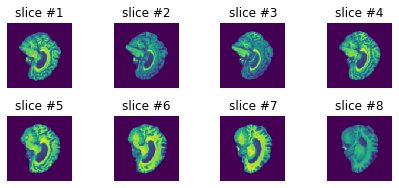

In [5]:
for i in range(0, 2):

    for j in range(1, 5):
        index = i*4
        ax = plt.subplot(3, 4, index + j)
        plt.tight_layout()
        ax.set_title('slice #{}'.format(index + j))
        ax.axis('off')
        show_image(mri[50 + (index+j)*2])

# Loading CSV

In [6]:
adnimerge_df = pd.read_csv("ADNIMERGE.csv")
diagnosis_df = pd.read_csv("DXSUM_PDXCONV_ADNIALL.csv")
image_df = pd.read_csv("hsp_masked_3_09_2020.csv")

C:\Users\Danny\Miniconda3\envs\hsp\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (18,19,20,103,104) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
adnimerge_df.head()

,RID,PTID,VISCODE,SITE,COLPROT,ORIGPROT,EXAMDATE,DX_bl,AGE,PTGENDER,...,TAU_bl,PTAU_bl,FDG_bl,PIB_bl,AV45_bl,Years_bl,Month_bl,Month,M,update_stamp
0,2,011_S_0002,bl,11,ADNI1,ADNI1,2005-09-08,CN,74.3,Male,...,NaN,NaN,1.36665,NaN,NaN,0.000000,0.00000,0,0.0,2020-01-09 04:20:17.0
1,3,011_S_0003,bl,11,ADNI1,ADNI1,2005-09-12,AD,81.3,Male,...,239.7,22.83,1.08355,NaN,NaN,0.000000,0.00000,0,0.0,2020-01-09 04:20:17.0
2,3,011_S_0003,m06,11,ADNI1,ADNI1,2006-03-13,AD,81.3,Male,...,239.7,22.83,1.08355,NaN,NaN,0.498289,5.96721,6,6.0,2020-01-09 04:20:17.0
3,3,011_S_0003,m12,11,ADNI1,ADNI1,2006-09-12,AD,81.3,Male,...,239.7,22.83,1.08355,NaN,NaN,0.999316,11.96720,12,12.0,2020-01-09 04:20:17.0
4,3,011_S_0003,m24,11,ADNI1,ADNI1,2007-09-12,AD,81.3,Male,...,239.7,22.83,1.08355,NaN,NaN,1.998630,23.93440,24,24.0,2020-01-09 04:20:17.0


In [8]:
diagnosis_df.head()

,Phase,ID,RID,SITEID,VISCODE,VISCODE2,USERDATE,USERDATE2,EXAMDATE,DXCHANGE,...,DXPATYP,DXPOTHSP,DXDEP,DXDEPSP,DXOTHDEM,DXODES,DXOOTHSP,DXCONFID,DIAGNOSIS,update_stamp
0,ADNI1,2.0,2,107,bl,bl,2005-10-01,NaN,2005-09-29,NaN,...,-4.0,-4,NaN,NaN,-4.0,-4.0,-4,4.0,NaN,2005-10-01 00:00:00.0
1,ADNI1,4.0,3,107,bl,bl,2005-10-01,NaN,2005-09-30,NaN,...,-4.0,-4,NaN,NaN,-4.0,-4.0,-4,3.0,NaN,2005-10-01 00:00:00.0
2,ADNI1,6.0,5,107,bl,bl,2005-10-01,NaN,2005-09-30,NaN,...,-4.0,-4,NaN,NaN,-4.0,-4.0,-4,4.0,NaN,2005-10-01 00:00:00.0
3,ADNI1,8.0,8,107,bl,bl,2005-10-01,NaN,2005-09-30,NaN,...,-4.0,-4,NaN,NaN,-4.0,-4.0,-4,3.0,NaN,2005-10-01 00:00:00.0
4,ADNI1,10.0,7,10,bl,bl,2005-10-06,NaN,2005-10-06,NaN,...,-4.0,-4,NaN,NaN,-4.0,-4.0,-4,4.0,NaN,2005-10-06 00:00:00.0


In [9]:
for col in adnimerge_df.columns:
    print(col)

RID
PTID
VISCODE
SITE
COLPROT
ORIGPROT
EXAMDATE
DX_bl
AGE
PTGENDER
PTEDUCAT
PTETHCAT
PTRACCAT
PTMARRY
APOE4
FDG
PIB
AV45
ABETA
TAU
PTAU
CDRSB
ADAS11
ADAS13
ADASQ4
MMSE
RAVLT_immediate
RAVLT_learning
RAVLT_forgetting
RAVLT_perc_forgetting
LDELTOTAL
DIGITSCOR
TRABSCOR
FAQ
MOCA
EcogPtMem
EcogPtLang
EcogPtVisspat
EcogPtPlan
EcogPtOrgan
EcogPtDivatt
EcogPtTotal
EcogSPMem
EcogSPLang
EcogSPVisspat
EcogSPPlan
EcogSPOrgan
EcogSPDivatt
EcogSPTotal
FLDSTRENG
FSVERSION
IMAGEUID
Ventricles
Hippocampus
WholeBrain
Entorhinal
Fusiform
MidTemp
ICV
DX
mPACCdigit
mPACCtrailsB
EXAMDATE_bl
CDRSB_bl
ADAS11_bl
ADAS13_bl
ADASQ4_bl
MMSE_bl
RAVLT_immediate_bl
RAVLT_learning_bl
RAVLT_forgetting_bl
RAVLT_perc_forgetting_bl
LDELTOTAL_BL
DIGITSCOR_bl
TRABSCOR_bl
FAQ_bl
mPACCdigit_bl
mPACCtrailsB_bl
FLDSTRENG_bl
FSVERSION_bl
Ventricles_bl
Hippocampus_bl
WholeBrain_bl
Entorhinal_bl
Fusiform_bl
MidTemp_bl
ICV_bl
MOCA_bl
EcogPtMem_bl
EcogPtLang_bl
EcogPtVisspat_bl
EcogPtPlan_bl
EcogPtOrgan_bl
EcogPtDivatt_bl
EcogPtTota

In [10]:
adnimerge_df.shape

(14663, 113)

In [11]:
adnimerge_df['ADAS11'].value_counts()

6.00     555
5.00     529
7.00     511
4.00     476
9.00     463
        ... 
44.67      1
55.33      1
62.00      1
48.67      1
57.67      1
Name: ADAS11, Length: 165, dtype: int64

# Utilities

In [12]:
def get_acq_year(im_data_id=420849, img_df=image_df):

    #get the acq year
    acq_date = img_df[img_df['Image Data ID'] == im_data_id]["Acq Date"].iloc[0] #there will only ever be one record output
    acq_year_str = ""

    slash_count = 0
    for c in acq_date:
        if (c == "/"):
            slash_count += 1

        if (slash_count == 2):
            acq_year_str += c

    acq_year = int(acq_year_str[1:])
    return acq_year

def get_rid(im_data_id=420849, img_df=image_df):
    
    sbj_str = img_df[img_df['Image Data ID'] == im_data_id]["Subject"].iloc[0]

    undr_cnt = 0
    rid_str = ""
    for c in sbj_str:
        if (c == '_'):
            undr_cnt += 1
        if (undr_cnt == 2):
            rid_str += c

    rid = int(rid_str[1:])
    return rid
    

In [13]:
# def get_acq_year_str(im_data_id, im_df):
    
#     acq_date = im_df[im_df['Image Data ID'] == im_data_id]["Acq Date"].iloc[0] 
#     acq_year_str = ""

#     slash_count = 0
#     for c in acq_date:
#         if (c == "/"):
#             slash_count += 1

#         if (slash_count == 2):
#             acq_year_str += c

#     return acq_year_str[1:]

# Data Preperation

## Droping records Containing Null and Unecessary Columns

In [14]:
adnimerge_df.dropna(axis=0, subset=['APOE4' , 'CDRSB', 'ADAS11', 'ADAS13', 'RAVLT_immediate', 'RAVLT_learning', 'RAVLT_forgetting', 'RAVLT_perc_forgetting', 'DX_bl', 'EXAMDATE'], inplace=True)

In [15]:
adnimerge_df.shape

(9750, 113)

In [16]:
columns_keep = ['APOE4' , 'CDRSB', 'ADAS11', 'ADAS13', 'RAVLT_immediate', 'RAVLT_learning', 'RAVLT_forgetting', 'RAVLT_perc_forgetting', 'RID', 'PTID','AGE', 'PTGENDER', 'PTEDUCAT', 'PTRACCAT', 'PTETHCAT', 'DX_bl', 'EXAMDATE']

In [17]:
for col in adnimerge_df.columns:
    valid = False
    for col2 in columns_keep:
        if (col == col2):
            valid = True
    if (valid == False):
        adnimerge_df.drop(col, axis=1, inplace=True)
        

In [18]:
adnimerge_df.columns

Index(['RID', 'PTID', 'EXAMDATE', 'DX_bl', 'AGE', 'PTGENDER', 'PTEDUCAT',
       'PTETHCAT', 'PTRACCAT', 'APOE4', 'CDRSB', 'ADAS11', 'ADAS13',
       'RAVLT_immediate', 'RAVLT_learning', 'RAVLT_forgetting',
       'RAVLT_perc_forgetting'],
      dtype='object')

## Determining Conversions 

The following code changes the image data group column to specify whether the subject will convert from MCI in the future.

The future in this case, is anywhere in the next 3 years from when the image was obtained.

In [19]:
processed_df = adnimerge_df
sLength      = adnimerge_df.size
processed_df = processed_df.assign(converted=pd.Series(np.zeros(sLength))) ; processed_df.head()

,RID,PTID,EXAMDATE,DX_bl,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,APOE4,CDRSB,ADAS11,ADAS13,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,RAVLT_perc_forgetting,converted
0,2,011_S_0002,2005-09-08,CN,74.3,Male,16,Not Hisp/Latino,White,0.0,0.0,10.67,18.67,44.0,4.0,6.0,54.5455,0.0
1,3,011_S_0003,2005-09-12,AD,81.3,Male,18,Not Hisp/Latino,White,1.0,4.5,22.00,31.00,22.0,1.0,4.0,100.0000,0.0
2,3,011_S_0003,2006-03-13,AD,81.3,Male,18,Not Hisp/Latino,White,1.0,6.0,19.00,30.00,19.0,2.0,6.0,100.0000,0.0
3,3,011_S_0003,2006-09-12,AD,81.3,Male,18,Not Hisp/Latino,White,1.0,3.5,24.00,35.00,31.0,2.0,7.0,100.0000,0.0
4,3,011_S_0003,2007-09-12,AD,81.3,Male,18,Not Hisp/Latino,White,1.0,8.0,25.67,37.67,23.0,1.0,5.0,100.0000,0.0


In [20]:
empty_rows = 0
total_not_found = 0
num_converted = 0
merge_but_not_df_diagnosis_count = 0
    
for i, row in image_df.iterrows():
    
    id        = int(row['Image Data ID'])
    sbj_id    = row['Subject']
    sbj_rid   = get_rid(id)
    sbj_acq_y = get_acq_year(id)

    #gets the rows for the subject rid
    sbj_dx_df = diagnosis_df[diagnosis_df['RID'] == sbj_rid]

    years_ahead = 1
    future_found = False
    repeat = True
    conversion = False
    
    while (repeat):
        
        #selects only the records for the subsequent year from when the mri was taken
        acq_y_str = str(sbj_acq_y + years_ahead)
        dx_rows = sbj_dx_df[sbj_dx_df['EXAMDATE'].str.contains(acq_y_str)]
        amerge_rows = adnimerge_df[adnimerge_df["PTID"] == sbj_id]

        if (len(dx_rows) != 0):
            
            for i in range(len(dx_rows)):            
                
                if (dx_rows.iloc[i]['DXCONV'] == 3): #They are in ADNI 1.
                    
                    #processed_df[processed_df["PTID"] == sbj_id]["converted"] = 1
                    processed_df.loc[processed_df.RID == sbj_rid, 'converted'] = 1
                    repeat = False
                    conversion = True
                    num_converted += 1

                elif (dx_rows.iloc[i]['DXCHANGE'] == 5): #They are in ADNI GO or ADNI3.
                    
                    #processed_df[processed_df["PTID"] == sbj_id]["converted"] = 1
                    processed_df.loc[processed_df.RID == sbj_rid, 'converted'] = 1
                    repeat = False
                    conversion = True
                    num_converted += 1
                    
            future_found = True
            
        elif (len(amerge_rows) != 0):
            future_found = True
            #for i in range(len(rows_amerge)):
                #print("present in adnimerge but not in the dfdiagnosis")
            
        years_ahead += 1
        
        if (years_ahead > 3):
            repeat = False
    
        
    if (future_found == False):
        total_not_found += 1
        
print("Total not found is: ", total_not_found)
print("Total that converted is: ", num_converted)

Total not found is:  19
Total that converted is:  105


In [21]:
processed_df[processed_df['converted'] == 1]

,RID,PTID,EXAMDATE,DX_bl,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,APOE4,CDRSB,ADAS11,ADAS13,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,RAVLT_perc_forgetting,converted
316,123,131_S_0123,2006-02-07,CN,73.3,Male,20,Not Hisp/Latino,White,0.0,0.0,4.00,5.00,50.0,4.0,-2.0,-20.0000,1.0
317,123,131_S_0123,2006-08-17,CN,73.3,Male,20,Not Hisp/Latino,White,0.0,0.0,4.33,10.33,46.0,5.0,2.0,18.1818,1.0
318,123,131_S_0123,2007-02-01,CN,73.3,Male,20,Not Hisp/Latino,White,0.0,0.0,14.00,15.00,46.0,5.0,5.0,41.6667,1.0
319,123,131_S_0123,2008-03-20,CN,73.3,Male,20,Not Hisp/Latino,White,0.0,0.0,4.67,7.67,51.0,7.0,2.0,14.2857,1.0
320,123,131_S_0123,2011-03-08,CN,73.3,Male,20,Not Hisp/Latino,White,0.0,1.0,4.00,6.00,46.0,2.0,-2.0,-20.0000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13317,4507,126_S_4507,2018-05-28,LMCI,78.2,Male,16,Not Hisp/Latino,White,1.0,8.0,27.33,38.33,21.0,-1.0,4.0,100.0000,1.0
13525,4902,016_S_4902,2018-07-16,LMCI,75.3,Female,15,Hisp/Latino,White,1.0,10.0,32.67,44.67,7.0,3.0,3.0,100.0000,1.0
13623,4506,098_S_4506,2018-10-15,CN,71.5,Male,19,Not Hisp/Latino,White,0.0,0.0,9.33,18.33,41.0,3.0,1.0,11.1111,1.0
13975,4507,126_S_4507,2019-05-14,LMCI,78.2,Male,16,Not Hisp/Latino,White,1.0,9.0,22.33,33.33,22.0,1.0,4.0,100.0000,1.0


Now to update the image data.

In [22]:
cols = list(processed_df)
# move the column to head of list using index, pop and insert
cols.append(cols.pop(cols.index('DX_bl')))
# use ix to reorder
processed_df = processed_df.reindex(columns=cols)

In [23]:
processed_df = processed_df[processed_df['DX_bl'].notnull()]

In [24]:
processed_df[processed_df['PTID'] == "023_S_0217"]

,RID,PTID,EXAMDATE,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,APOE4,CDRSB,ADAS11,ADAS13,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,RAVLT_perc_forgetting,converted,DX_bl
513,217,023_S_0217,2007-03-02,83.6,Female,18,Not Hisp/Latino,White,0.0,2.0,9.00,18.00,26.0,2.0,6.0,100.0000,0.0,LMCI
514,217,023_S_0217,2010-03-12,83.6,Female,18,Not Hisp/Latino,White,0.0,5.5,21.00,32.00,13.0,0.0,3.0,100.0000,0.0,LMCI
515,217,023_S_0217,2011-03-02,83.6,Female,18,Not Hisp/Latino,White,0.0,10.0,22.00,33.00,16.0,0.0,3.0,100.0000,0.0,LMCI
5652,217,023_S_0217,2006-02-28,83.6,Female,18,Not Hisp/Latino,White,0.0,1.0,9.33,18.33,30.0,1.0,4.0,66.6667,0.0,LMCI
5653,217,023_S_0217,2006-08-15,83.6,Female,18,Not Hisp/Latino,White,0.0,1.0,13.67,22.67,27.0,0.0,6.0,100.0000,0.0,LMCI
5654,217,023_S_0217,2007-08-07,83.6,Female,18,Not Hisp/Latino,White,0.0,2.0,14.00,23.00,22.0,3.0,6.0,100.0000,0.0,LMCI
5655,217,023_S_0217,2008-02-21,83.6,Female,18,Not Hisp/Latino,White,0.0,4.0,14.67,24.67,25.0,-2.0,3.0,100.0000,0.0,LMCI
5657,217,023_S_0217,2009-03-06,83.6,Female,18,Not Hisp/Latino,White,0.0,3.5,13.00,23.00,22.0,1.0,5.0,100.0000,0.0,LMCI
10905,217,023_S_0217,2012-05-23,83.6,Female,18,Not Hisp/Latino,White,0.0,12.0,24.00,36.00,14.0,3.0,4.0,100.0000,0.0,LMCI


For every row where the subject has converted change the DX_bl to pMCI. Where the subject hasn't converted change it to sMCI.

In [25]:
for i, row in processed_df.iterrows():
    
    sbj_rid   = row['RID']
    DX_bl     = row['DX_bl']
    converted = row['converted']

    
    if (DX_bl == 'MCI' or DX_bl == 'EMCI' or DX_bl == 'LMCI'):
        if(converted == 1):
            processed_df.loc[processed_df.RID == sbj_rid, 'DX_bl'] = 'pMCI'
        else:
            processed_df.loc[processed_df.RID == sbj_rid, 'DX_bl'] = 'sMCI'

        

In [26]:
processed_df[processed_df["DX_bl"] == "pMCI"] 

,RID,PTID,EXAMDATE,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,APOE4,CDRSB,ADAS11,ADAS13,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,RAVLT_perc_forgetting,converted,DX_bl
2215,1074,003_S_1074,2007-02-07,85.0,Female,15,Not Hisp/Latino,White,0.0,1.0,5.00,11.00,54.0,10.0,1.0,7.14286,1.0,pMCI
2216,1074,003_S_1074,2008-02-07,85.0,Female,15,Not Hisp/Latino,White,0.0,1.0,17.00,27.00,47.0,9.0,4.0,33.33330,1.0,pMCI
2217,1074,003_S_1074,2009-02-26,85.0,Female,15,Not Hisp/Latino,White,0.0,0.5,11.67,16.67,41.0,7.0,5.0,41.66670,1.0,pMCI
2879,2047,098_S_2047,2010-09-07,77.4,Male,18,Not Hisp/Latino,White,1.0,2.5,8.00,14.00,26.0,2.0,6.0,100.00000,1.0,pMCI
2926,2106,007_S_2106,2010-10-13,77.5,Male,12,Not Hisp/Latino,White,0.0,1.0,8.00,15.00,20.0,3.0,2.0,40.00000,1.0,pMCI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11491,1074,003_S_1074,2017-09-22,85.0,Female,15,Not Hisp/Latino,White,0.0,4.5,22.33,34.33,21.0,3.0,6.0,100.00000,1.0,pMCI
13317,4507,126_S_4507,2018-05-28,78.2,Male,16,Not Hisp/Latino,White,1.0,8.0,27.33,38.33,21.0,-1.0,4.0,100.00000,1.0,pMCI
13525,4902,016_S_4902,2018-07-16,75.3,Female,15,Hisp/Latino,White,1.0,10.0,32.67,44.67,7.0,3.0,3.0,100.00000,1.0,pMCI
13975,4507,126_S_4507,2019-05-14,78.2,Male,16,Not Hisp/Latino,White,1.0,9.0,22.33,33.33,22.0,1.0,4.0,100.00000,1.0,pMCI


In [27]:
processed_df["DX_bl"].value_counts()

sMCI    5078
CN      2822
AD      1016
SMC      648
pMCI     186
Name: DX_bl, dtype: int64

Now to delete the converted column

In [28]:
processed_df.drop("converted", axis=1, inplace=True)

## Delete all the rows that do not contain the selected labels.

In [29]:
processed_df = processed_df[processed_df['DX_bl'] != 'SMC']

In [30]:
processed_df['DX_bl'].value_counts()

sMCI    5078
CN      2822
AD      1016
pMCI     186
Name: DX_bl, dtype: int64

Changing diagnosis column name to label

In [31]:
label = processed_df["DX_bl"]
label.head()

0    CN
1    AD
2    AD
3    AD
4    AD
Name: DX_bl, dtype: object

In [32]:
processed_df["label"] = label

In [34]:
processed_df.drop('DX_bl', axis=1, inplace=True)

In [37]:
processed_df.shape

(9102, 17)

## Converting categorical to numerical (Integer Encoding)

In [32]:
processed_df.PTGENDER = pd.Categorical(processed_df.PTGENDER)
processed_df['GENDER'] = processed_df.PTGENDER.cat.codes
processed_df.drop('PTGENDER', axis=1, inplace=True)

processed_df.PTETHCAT = pd.Categorical(processed_df.PTETHCAT)
processed_df['ETHCAT'] = processed_df.PTETHCAT.cat.codes
processed_df.drop('PTETHCAT', axis=1, inplace=True)

processed_df.PTRACCAT = pd.Categorical(processed_df.PTRACCAT)
processed_df['RACCAT'] = processed_df.PTRACCAT.cat.codes
processed_df.drop('PTRACCAT', axis=1, inplace=True)

# Combine processed_df and image_df into a single dataframe

## Making the longitudinal df

In [38]:
processed_df.head()

,RID,PTID,EXAMDATE,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,APOE4,CDRSB,ADAS11,ADAS13,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,RAVLT_perc_forgetting,label
0,2,011_S_0002,2005-09-08,74.3,Male,16,Not Hisp/Latino,White,0.0,0.0,10.67,18.67,44.0,4.0,6.0,54.5455,CN
1,3,011_S_0003,2005-09-12,81.3,Male,18,Not Hisp/Latino,White,1.0,4.5,22.00,31.00,22.0,1.0,4.0,100.0000,AD
2,3,011_S_0003,2006-03-13,81.3,Male,18,Not Hisp/Latino,White,1.0,6.0,19.00,30.00,19.0,2.0,6.0,100.0000,AD
3,3,011_S_0003,2006-09-12,81.3,Male,18,Not Hisp/Latino,White,1.0,3.5,24.00,35.00,31.0,2.0,7.0,100.0000,AD
4,3,011_S_0003,2007-09-12,81.3,Male,18,Not Hisp/Latino,White,1.0,8.0,25.67,37.67,23.0,1.0,5.0,100.0000,AD


In [39]:
data = []

for i, im_rows in image_df.iterrows():
    
    clinical    = []
    ptid        = im_rows.loc["Subject"]
    im_data_id  = im_rows.loc["Image Data ID"]
    clinical.append(im_data_id)
    acq_year    = str(get_acq_year(im_data_id, image_df))
    
    rows = processed_df.loc[processed_df['PTID'] == ptid]

    i = -1

    for i in range(len(rows)):
        if(acq_year in rows.iloc[i]['EXAMDATE']):
            break

    if (i != -1):
        for k in range(3, 17):
            clinical.append(rows.iloc[i][k])

        data.append(clinical)


In [40]:
columns = ["Image Data ID"]
proc_columns = processed_df.columns
for i in range (3, 17):
    columns.append(proc_columns[i])

lon_clin_df = pd.DataFrame(data, columns=columns)

In [41]:
lon_clin_df.head()

,Image Data ID,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,APOE4,CDRSB,ADAS11,ADAS13,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,RAVLT_perc_forgetting,label
0,420849,62.9,Female,16,Not Hisp/Latino,White,0.0,1.5,8.0,11.0,42.0,10.0,1.0,7.69231,sMCI
1,786087,85.9,Male,16,Not Hisp/Latino,White,0.0,0.0,5.0,8.0,39.0,7.0,2.0,18.18180,sMCI
2,537823,85.0,Female,15,Not Hisp/Latino,White,0.0,1.0,12.0,23.0,28.0,2.0,6.0,85.71430,pMCI
3,537826,61.0,Female,12,Not Hisp/Latino,White,1.0,3.5,26.0,38.0,20.0,2.0,5.0,100.00000,sMCI
4,537827,72.6,Male,12,Not Hisp/Latino,White,1.0,8.0,18.0,29.0,22.0,4.0,5.0,83.33330,sMCI


In [51]:
lon_clin_df.to_csv("./lon_clin_with_categorical.csv", index=False)

In [43]:
lon_clin_df["label"].value_counts()

sMCI    386
CN      223
pMCI    155
AD      154
Name: label, dtype: int64

In [44]:
lon_clin_df[lon_clin_df["label"] == "AD"]["APOE4"].value_counts()

1.0    80
0.0    50
2.0    24
Name: APOE4, dtype: int64

## Making Baseline only df

In [45]:
data = []
unique_subjects = []

for i, im_rows in image_df.iterrows():
    
    clinical    = []
    ptid        = im_rows.loc["Subject"]

    if (ptid in unique_subjects):
        continue #skips to the next for loop iteration
    else:
        unique_subjects.append(ptid)
        
    im_data_id  = im_rows.loc["Image Data ID"]
    clinical.append(im_data_id)
    acq_year    = str(get_acq_year(im_data_id, image_df))
    
    rows = processed_df.loc[processed_df['PTID'] == ptid]

    i = -1

    for i in range(len(rows)):
        if(acq_year in rows.iloc[i]['EXAMDATE']):
            break

    if (i != -1):
        for k in range(3, 17):
            clinical.append(rows.iloc[i][k])

        data.append(clinical)

In [46]:
columns = ["Image Data ID"]
proc_columns = processed_df.columns
for i in range (3, 17):
    columns.append(proc_columns[i])


bas_clin = pd.DataFrame(data, columns=columns)

In [47]:
print(len(bas_clin))

227


In [48]:
bas_clin.head()

,Image Data ID,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,APOE4,CDRSB,ADAS11,ADAS13,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,RAVLT_perc_forgetting,label
0,420849,62.9,Female,16,Not Hisp/Latino,White,0.0,1.5,8.0,11.0,42.0,10.0,1.0,7.69231,sMCI
1,786087,85.9,Male,16,Not Hisp/Latino,White,0.0,0.0,5.0,8.0,39.0,7.0,2.0,18.18180,sMCI
2,537823,85.0,Female,15,Not Hisp/Latino,White,0.0,1.0,12.0,23.0,28.0,2.0,6.0,85.71430,pMCI
3,537826,61.0,Female,12,Not Hisp/Latino,White,1.0,3.5,26.0,38.0,20.0,2.0,5.0,100.00000,sMCI
4,537827,72.6,Male,12,Not Hisp/Latino,White,1.0,8.0,18.0,29.0,22.0,4.0,5.0,83.33330,sMCI


In [50]:
bas_clin.to_csv("./bas_clin_with_categorical.csv", index=False)

In [49]:
bas_clin["label"].value_counts()

sMCI    92
CN      57
AD      45
pMCI    33
Name: label, dtype: int64

# Data Processing

## Data Normalization

In [45]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
column_names_to_normalize = ['AGE', 'APOE4', 'PTEDUCAT', 'CDRSB', 'ADAS11', 'ADAS13', 'RAVLT_immediate', 'RAVLT_learning', 'RAVLT_forgetting', 'RAVLT_perc_forgetting']

In [46]:
#Notmalizing longitudinal df
x = lon_clin_df[column_names_to_normalize].values
x_scaled = min_max_scaler.fit_transform(x)
temp_df = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = lon_clin_df.index)
lon_clin_df[column_names_to_normalize] = temp_df

lon_clin_df.head()

,Image Data ID,AGE,PTEDUCAT,APOE4,CDRSB,ADAS11,ADAS13,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,RAVLT_perc_forgetting,DX_bl,GENDER,ETHCAT,RACCAT
0,420849,0.223796,0.636364,0.0,0.107143,0.155556,0.169492,0.567164,0.857143,0.294118,0.323077,sMCI,0,1,6
1,786087,0.875354,0.636364,0.0,0.000000,0.088889,0.118644,0.522388,0.642857,0.352941,0.400000,sMCI,1,1,6
2,537823,0.849858,0.545455,0.0,0.071429,0.244444,0.372881,0.358209,0.285714,0.588235,0.895238,pMCI,0,1,6
3,537826,0.169972,0.272727,0.5,0.250000,0.555556,0.627119,0.238806,0.285714,0.529412,1.000000,sMCI,0,1,6
4,537827,0.498584,0.272727,0.5,0.571429,0.377778,0.474576,0.268657,0.428571,0.529412,0.877778,sMCI,1,1,6


In [47]:
x = bas_clin[column_names_to_normalize].values
x_scaled = min_max_scaler.fit_transform(x)
temp_df = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = bas_clin.index)
bas_clin[column_names_to_normalize] = temp_df

bas_clin.head()

,Image Data ID,AGE,PTEDUCAT,APOE4,CDRSB,ADAS11,ADAS13,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,RAVLT_perc_forgetting,DX_bl,GENDER,ETHCAT,RACCAT
0,420849,0.223796,0.636364,0.0,0.125000,0.179487,0.20,0.569231,0.916667,0.333333,0.323077,sMCI,0,1,6
1,786087,0.875354,0.636364,0.0,0.000000,0.102564,0.14,0.523077,0.666667,0.400000,0.400000,sMCI,1,1,6
2,537823,0.849858,0.545455,0.0,0.083333,0.282051,0.44,0.353846,0.250000,0.666667,0.895238,pMCI,0,1,6
3,537826,0.169972,0.272727,0.5,0.291667,0.641026,0.74,0.230769,0.250000,0.600000,1.000000,sMCI,0,1,6
4,537827,0.498584,0.272727,0.5,0.666667,0.435897,0.56,0.261538,0.416667,0.600000,0.877778,sMCI,1,1,6


## Perfoming OHE on categorical variables

In [48]:
#Doing it on the longitudinal data
ohe = pd.get_dummies(lon_clin_df['ETHCAT'], prefix="ethcat")
ohe.head()

lon_clin_df.drop('ETHCAT', axis=1, inplace=True)
lon_clin_df = pd.concat([lon_clin_df, ohe], sort=False, axis=1)

ohe = pd.get_dummies(lon_clin_df['RACCAT'], prefix="raccat")
ohe.head()

lon_clin_df.drop('RACCAT', axis=1, inplace=True)
lon_clin_df = pd.concat([lon_clin_df, ohe], sort=False, axis=1)

#Doing it on the baseline data
ohe = pd.get_dummies(bas_clin['ETHCAT'], prefix="ethcat")
ohe.head()

bas_clin.drop('ETHCAT', axis=1, inplace=True)
bas_clin = pd.concat([bas_clin, ohe], sort=False, axis=1)

ohe = pd.get_dummies(bas_clin['RACCAT'], prefix="raccat")
ohe.head()

bas_clin.drop('RACCAT', axis=1, inplace=True)
bas_clin = pd.concat([bas_clin, ohe], sort=False, axis=1)

In [49]:
lon_clin_df.head()

,Image Data ID,AGE,PTEDUCAT,APOE4,CDRSB,ADAS11,ADAS13,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,...,DX_bl,GENDER,ethcat_0,ethcat_1,ethcat_2,raccat_0,raccat_1,raccat_2,raccat_4,raccat_6
0,420849,0.223796,0.636364,0.0,0.107143,0.155556,0.169492,0.567164,0.857143,0.294118,...,sMCI,0,0,1,0,0,0,0,0,1
1,786087,0.875354,0.636364,0.0,0.000000,0.088889,0.118644,0.522388,0.642857,0.352941,...,sMCI,1,0,1,0,0,0,0,0,1
2,537823,0.849858,0.545455,0.0,0.071429,0.244444,0.372881,0.358209,0.285714,0.588235,...,pMCI,0,0,1,0,0,0,0,0,1
3,537826,0.169972,0.272727,0.5,0.250000,0.555556,0.627119,0.238806,0.285714,0.529412,...,sMCI,0,0,1,0,0,0,0,0,1
4,537827,0.498584,0.272727,0.5,0.571429,0.377778,0.474576,0.268657,0.428571,0.529412,...,sMCI,1,0,1,0,0,0,0,0,1


## Standardise the datasets to the format the network was trained with in the past.

In [50]:
lon_clin_df["raccat_3"] = 0
lon_clin_df["raccat_5"] = 0
bas_clin["raccat_3"]    = 0
bas_clin["raccat_5"]    = 0

In [51]:
lon_clin_df.columns

Index(['Image Data ID', 'AGE', 'PTEDUCAT', 'APOE4', 'CDRSB', 'ADAS11',
       'ADAS13', 'RAVLT_immediate', 'RAVLT_learning', 'RAVLT_forgetting',
       'RAVLT_perc_forgetting', 'DX_bl', 'GENDER', 'ethcat_0', 'ethcat_1',
       'ethcat_2', 'raccat_0', 'raccat_1', 'raccat_2', 'raccat_4', 'raccat_6',
       'raccat_3', 'raccat_5'],
      dtype='object')

In [52]:
columns = ["Image Data ID", "AGE", "PTEDUCAT", "APOE4", "CDRSB", "ADAS11", "ADAS13", "RAVLT_immediate", "RAVLT_learning", "RAVLT_forgetting", "RAVLT_perc_forgetting", "GENDER", "ethcat_0", "ethcat_1", "ethcat_2", "raccat_0", "raccat_1", "raccat_2", "raccat_3", "raccat_4", "raccat_5", "raccat_6", "label"]


lon_clin_df = lon_clin_df.reindex(columns, axis=1)
bas_clin    = bas_clin.reindex(columns, axis=1)


In [54]:
lon_clin_df.head()

,Image Data ID,AGE,PTEDUCAT,APOE4,CDRSB,ADAS11,ADAS13,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,...,ethcat_1,ethcat_2,raccat_0,raccat_1,raccat_2,raccat_3,raccat_4,raccat_5,raccat_6,label
0,420849,0.223796,0.636364,0.0,0.107143,0.155556,0.169492,0.567164,0.857143,0.294118,...,1,0,0,0,0,0,0,0,1,NaN
1,786087,0.875354,0.636364,0.0,0.000000,0.088889,0.118644,0.522388,0.642857,0.352941,...,1,0,0,0,0,0,0,0,1,NaN
2,537823,0.849858,0.545455,0.0,0.071429,0.244444,0.372881,0.358209,0.285714,0.588235,...,1,0,0,0,0,0,0,0,1,NaN
3,537826,0.169972,0.272727,0.5,0.250000,0.555556,0.627119,0.238806,0.285714,0.529412,...,1,0,0,0,0,0,0,0,1,NaN
4,537827,0.498584,0.272727,0.5,0.571429,0.377778,0.474576,0.268657,0.428571,0.529412,...,1,0,0,0,0,0,0,0,1,NaN


(227, 23)

### Converting Label to OHE, can be skipped

In [37]:
ohe = pd.get_dummies(processed_df['DX_bl']) #had a prefix of label before
ohe.head()
processed_df.drop('DX_bl', axis=1, inplace=True)
processed_df = pd.concat([processed_df, ohe], sort=False, axis=1)

In [38]:
processed_df.head()

,RID,PTID,EXAMDATE,AGE,PTEDUCAT,APOE4,CDRSB,ADAS11,ADAS13,RAVLT_immediate,...,raccat_2,raccat_3,raccat_4,raccat_5,raccat_6,converted,AD,CN,pMCI,sMCI
0,2,011_S_0002,2005-09-08,0.537838,0.750,0.0,0.000000,0.180847,0.252297,0.581081,...,0,0,0,0,1,0.0,0,1,0,0
1,3,011_S_0003,2005-09-12,0.727027,0.875,1.0,0.264706,0.372881,0.418919,0.283784,...,0,0,0,0,1,0.0,1,0,0,0
2,3,011_S_0003,2006-03-13,0.727027,0.875,1.0,0.352941,0.322034,0.405405,0.243243,...,0,0,0,0,1,0.0,1,0,0,0
3,3,011_S_0003,2006-09-12,0.727027,0.875,1.0,0.205882,0.406780,0.472973,0.405405,...,0,0,0,0,1,0.0,1,0,0,0
4,3,011_S_0003,2007-09-12,0.727027,0.875,1.0,0.470588,0.435085,0.509054,0.297297,...,0,0,0,0,1,0.0,1,0,0,0


# Saving to a file.

In [55]:
bas_clin.to_csv("./bas_clinical.csv", index=False)

In [56]:
lon_clin_df.to_csv("./lon_clin.csv", index=False)

In [42]:
image_df.describe()

,Image Data ID,Age,Visit
count,938.000000,938.000000,938.000000
mean,392623.071429,74.372068,24.786780
std,115087.635999,7.341869,6.321125
min,298789.000000,55.000000,3.000000
25%,334764.250000,70.000000,22.000000
50%,356751.500000,74.000000,25.000000
75%,413143.750000,79.000000,28.000000
max,880419.000000,94.000000,50.000000


In [40]:
image_df.head()

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,420849,003_S_0908,MCI,F,70,30,MRI,"Spatially Normalized, Masked and N3 corrected ...",Processed,1/06/2014,NiFTI,3/08/2020
1,786087,052_S_1352,MCI,M,94,32,MRI,"Spatially Normalized, Masked and N3 corrected ...",Processed,4/10/2015,NiFTI,3/08/2020
2,537823,003_S_1074,MCI,F,94,32,MRI,"Spatially Normalized, Masked and N3 corrected ...",Processed,4/22/2015,NiFTI,3/08/2020
3,537826,052_S_0671,MCI,F,70,32,MRI,"Spatially Normalized, Masked and N3 corrected ...",Processed,7/17/2015,NiFTI,3/08/2020
4,537827,052_S_1346,MCI,M,81,32,MRI,"Spatially Normalized, Masked and N3 corrected ...",Processed,3/31/2015,NiFTI,3/08/2020
